## Sentiment Analysis

In this week's practical we will be working  with a dataset that contains tweets about six different US airlines. The task is to predict whether a tweet contains a positive, a negative or a neutral sentiment about the airline. (Source: Modified version of an implementation by Usman Malik).

In [2]:
import numpy as np 
import pandas as pd 
import re
import nltk 
import matplotlib.pyplot as plt
%matplotlib inline

### Load the Dataset

In [3]:
df = pd.read_csv('airline-tweets.csv')

In [4]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


### Data Analysis

In [5]:
plot_size = plt.rcParams["figure.figsize"] 
print(plot_size[0]) 
print(plot_size[1])

plot_size[0] = 8
plot_size[1] = 6
plt.rcParams["figure.figsize"] = plot_size 

6.4
4.8


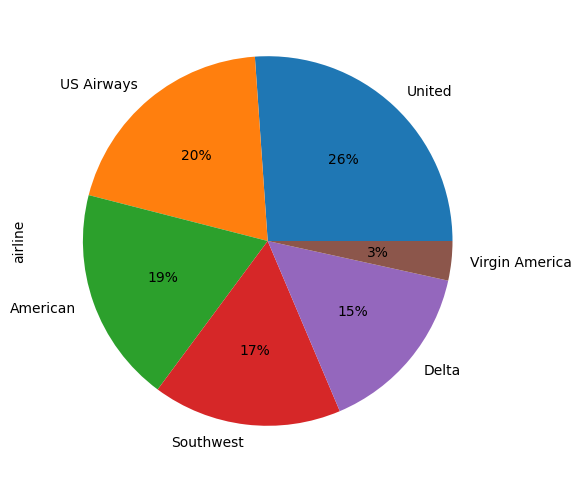

In [6]:
# Plots the percentage of tweets for each airline as a pie chart.

_ = df.airline.value_counts().plot(kind='pie', autopct='%1.0f%%')

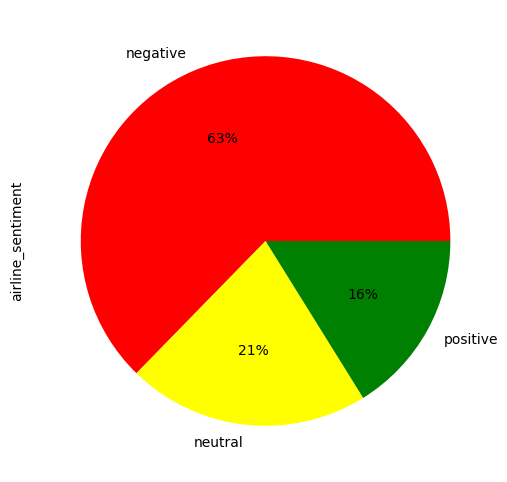

In [7]:
# Plots the distribution of sentiments across all the tweets as a pie chart.

_ = df.airline_sentiment.value_counts().plot(kind='pie', autopct='%1.0f%%', colors=["red", "yellow", "green"])

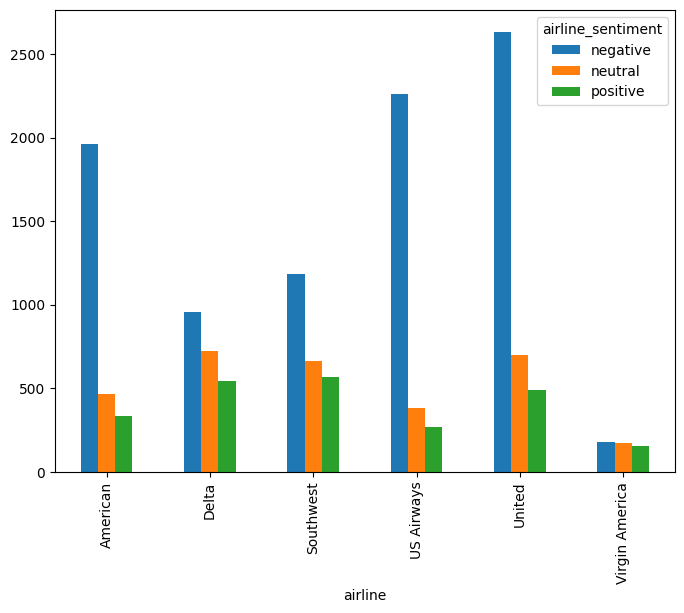

In [8]:
# Plots the distribution of sentiments for each individual airline as a bar chart.

airline_sentiment = df.groupby(['airline', 'airline_sentiment']).airline_sentiment.count().unstack()
_ = airline_sentiment.plot(kind='bar')

### Data Cleaning

Our feature set will consist of tweets only; the 11th column of the dataset contains the tweet text. Our label set will consist of the sentiment of the tweet that we have to predict. The sentiment of the tweet is in the second column (index 1). 

**Task 1:** Use the iloc method of the pandas data frame to create a feature set and a lable set.

In [11]:
# Your code goes here.
features = df['text']
labels = df['airline_sentiment']

The tweets need to be cleaned before they can be used for training a machine learning model. We can use regular expressions to achieve this. Please take a look at this w3school article https://www.w3schools.com/python/python_regex.asp for details on regular expressions.

**Task 2**: Complete the code below using regular expressions following the first example ("Remove all the special characters").

In [12]:
processed_features = []

for sentence in range(0, len(features)):
    # Remove all the special characters
    processed_feature = re.sub(r'\W', ' ', str(features[sentence]))

    # Remove all single characters
    # Your code goes here.

    # Remove single characters from the start
    # Your code goes here.

    # Substituting multiple spaces with single space
    # Your code goes here.
    
    # Removing prefixed 'b'
    # Your code goes here.

    # Converting to Lowercase
    # Your code goes here.

    processed_features.append(processed_feature)

### TF-IDF

**Task 3**: Use the TfidfVectorizer class and convert the text features into TF-IDF feature vectors. 
    For this use the following parameter settings: max_features = 2500, min_df = 7, max_df = 0.8 and use 'english' as stop words. 
        You can find a description of these parameters here: https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html
    
    
    
    

In [10]:
nltk.download('stopwords')
# Your code goes here.

### Training and Test Split

**Task 4**: Divide the data into a training set (80%) and a test set (20%) and set the random state parameter to 42.

In [11]:
# Your code goes here.

### Training a Naive Bayes Classifier

**Task 5**: Train a naive bayes classifier for multinomial models.

In [12]:
# Your code goes here.

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

### Making Predictions

**Taks 6**: Make predications on the model using the test data (X_test).

In [13]:
# Your code goes here.

### Evaluationg the Model

**Task 7**: Evaluate the model: (a) with the help of confusion matrix, (b) display the classification report, and (c) show the accuracy score for the classifier.

In [14]:
# Your code goes here.

[[1833   45   11]
 [ 374  189   17]
 [ 205   38  216]]


In [15]:
# Your code goes here.

              precision    recall  f1-score   support

    negative       0.76      0.97      0.85      1889
     neutral       0.69      0.33      0.44       580
    positive       0.89      0.47      0.61       459

    accuracy                           0.76      2928
   macro avg       0.78      0.59      0.64      2928
weighted avg       0.77      0.76      0.73      2928



In [16]:
# Your code goes here.

0.764344262295082


### Training a Random Forest Classifier

**Task 8**: Train a Random Forest classifier using 200 trees and set the random state parameter to 42.

In [17]:
# Your code goes here.

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

### Making Predictions

**Task 9:** Make predictions on the new model using the test data (X_test).

In [18]:
# Your code goes here.

### Evaluating the Model

**Task 10**: Evaluate the new model: (a) with the help of confusion matrix, (b) display the classification report, and (c) show accuracy score for the classifier.

In [19]:
# Your code goes here.

[[1757   92   40]
 [ 306  224   50]
 [ 140   54  265]]


In [20]:
# Your code goes here.

              precision    recall  f1-score   support

    negative       0.80      0.93      0.86      1889
     neutral       0.61      0.39      0.47       580
    positive       0.75      0.58      0.65       459

    accuracy                           0.77      2928
   macro avg       0.72      0.63      0.66      2928
weighted avg       0.75      0.77      0.75      2928



In [21]:
# Your code goes here.

0.7670765027322405
